# Time series classification using Support Vector Machine

## Importing modules

In [80]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVR
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Preparing data

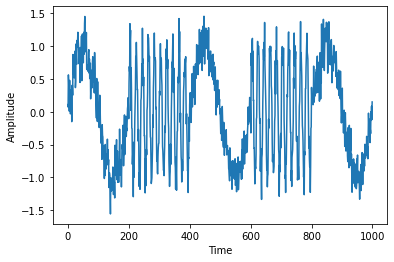

In [144]:
# Set the sampling rate and duration
Fs = 20  # Sampling rate (Hz)
duration = 10  # Duration of the signal (seconds)

# Create a time vector
t = np.arange(0, duration, 1/Fs)

# Create the sine wave signals with frequencies of 1Hz and 10Hz
freq1 = 0.1  # Frequency of the first sine wave (Hz)
freq2 = 1  # Frequency of the second sine wave (Hz)
signal1 = np.sin(2 * np.pi * freq1 * t)
label1 = np.ones(len(signal1))
signal2 = np.sin(2 * np.pi * freq2 * t)
label2 = np.zeros(len(signal1))

# Create the alternating signal
num_periods = 200
period = np.concatenate([signal1, signal2])
plabel = np.concatenate([label1, label2])
alternating_signal = np.tile(period, num_periods)
labels = np.tile(plabel, num_periods)

# Add Gaussian noise to the signal
mean = 0
stddev = 0.2
noise = np.random.normal(mean, stddev, alternating_signal.shape)
noisy_signal = alternating_signal + noise

ta = np.arange(len(alternating_signal))
# Plot the signal
plt.plot(ta[0:1000], noisy_signal[0:1000])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


In [145]:
# Define the number of columns and the number of positions to shift for each column
num_cols = 20

scaler = MinMaxScaler()

# Initialize the output array with zeros
output_array = np.zeros([len(noisy_signal), num_cols])
array = np.zeros([len(noisy_signal), 1])

array[:,0] = noisy_signal

# Fill the first column of the output array with the noisy signal
output_array[:, 0] = scaler.fit_transform(array)[:,0]

# Fill the remaining columns by shifting the noisy signal
for i in range(1, num_cols):
    output_array[:, i] = np.roll(output_array[:, 0] , i)
    
data = output_array


### Create training and testing data

In [211]:
# Create a training dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

# Create SVC model
model = SVC(kernel='rbf',gamma=1, tol=1, C=0.1, verbose=True, max_iter=2000)


In [212]:
# Fit model on training data

model.fit(X_train, y_train)

[LibSVM]

SVC(C=0.1, gamma=1, max_iter=2000, tol=1, verbose=True)

In [213]:
# Evaluate the classifier on the testing dataset
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9845


In [214]:
Svec = model.support_vectors_
print(len(Svec))

3244


In [215]:
y_pred = model.predict(data[0:1000,:])

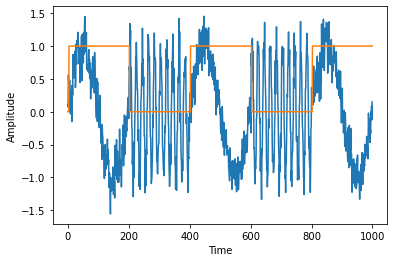

In [217]:
ta = np.arange(len(y_pred))
# Plot the signal
plt.plot(ta[0:1000], noisy_signal[0:1000],ta[0:1000],y_pred)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()